In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [11]:
pip install wget

In [12]:
cd/content/gdrive/My Drive/ML

/content/gdrive/My Drive/ML


In [0]:
import wget

In [0]:
link = "https://storage.googleapis.com/kaggle-data-sets/59760/840806/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589733452&Signature=ZsICwn0Rko1LcqYf%2Fm5Pxzy6P2WMPHWDc32VOOZ5O%2FffQIZeFi1qLgaLLkC0PJmmYcajbBGEzj6ncXQ6%2BFk9apbGAMaDXqxpFtz1NRVkZGmUgHZV6cQJJJJM2VaMo6Bq09L570QuYoP0uHROPYzTReHZvHrSer4r%2FjgGdggoBP9bn2K9fXaXOW14FfSsV7YhMgBrgzbaIBaq%2BQxXGkqflgk3u4Zl2eGvrlijqkk61%2FYOLVJvf2xiV%2Bu3Sr7Dm71xIXQ29ggrQqWyknhEIl%2Fh3ZC571XM%2Bd%2B5QwScN5AA9cBiRtTdwlAeMZoccCqd4r8XEPExkEJHNKN07oiXooosoA%3D%3D&response-content-disposition=attachment%3B+filename%3Danimals10.zip"

In [18]:
wget.download(link)

'animals10 (1).zip'

In [0]:
data = "./"

In [0]:
!unzip -q animals10.zip -d $data

In [21]:
pip install split-folders

In [0]:
import split_folders as sf

In [23]:
sf.ratio("raw-img", output = "./", ratio = (.8,.1,.1))

Copying files: 26179 files [09:37, 45.37 files/s]


In [0]:
train_data = data + "./train"
valid_data = data + "./val"

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(16, (3,3), activation="relu", input_shape = (100,100,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

In [0]:
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

In [30]:
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation= "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 46, 46, 64)        2

In [0]:
gen_train = ImageDataGenerator(rescale=1/255)
gen_valid = ImageDataGenerator(rescale=1/255)

In [32]:
gen_train_data = gen_train.flow_from_directory(
    train_data,
    target_size = (100,100),
    color_mode = "rgb",
    batch_size = 130,
    class_mode = "categorical"
)

Found 20938 images belonging to 10 classes.


In [33]:
gen_valid_data = gen_valid.flow_from_directory(
    valid_data,
    target_size = (100,100),
    color_mode = "rgb",
    batch_size = 130,
    class_mode = "categorical"
)

Found 2614 images belonging to 10 classes.


In [0]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["acc"])

In [35]:
history = model.fit_generator(
    gen_train_data,
    steps_per_epoch = 1000,
    epochs = 40,
    verbose = 1,
    validation_data = gen_valid_data,
    validation_steps = 1000
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
1000/1000 [==============================] - 1016s 1s/step - loss: 2.5227 - acc: 0.2722 - val_loss: 2.0131 - val_acc: 0.2747
Epoch 2/40
1000/1000 [==============================] - 1027s 1s/step - loss: 1.9548 - acc: 0.3150 - val_loss: 1.7626 - val_acc: 0.3844
Epoch 3/40
1000/1000 [==============================] - 998s 998ms/step - loss: 1.8209 - acc: 0.3535 - val_loss: 1.8393 - val_acc: 0.3993
Epoch 4/40
1000/1000 [==============================] - 937s 937ms/step - loss: 1.7003 - acc: 0.3839 - val_loss: 1.5064 - val_acc: 0.4633
Epoch 5/40
1000/1000 [==============================] - 895s 895ms/step - loss: 1.4863 - acc: 0.4503 - val_loss: 1.2709 - val_acc: 0.5558
Epoch 6/40
1000/1000 [==============================] - 867s 867ms/step - loss: 1.2223 - acc: 0.5437 - val_loss: 1.2062 - val_acc: 0.5952
Epoch 7/40
1000/1000 [==============================] - 875s 875ms/step - loss: 0.9653 - acc: 0.6395

In [0]:
model.save("classificationAnimals.h5")

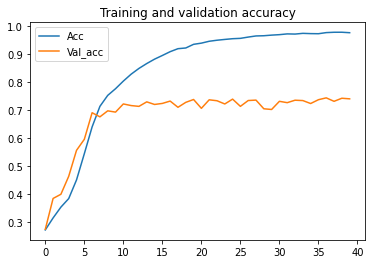

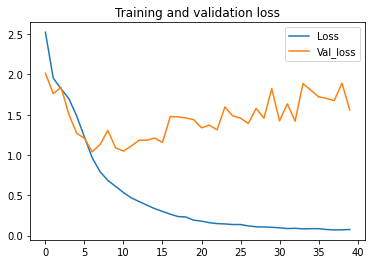

In [37]:

import matplotlib.pyplot as plt
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc))
plt.plot  ( epochs,     acc ,label = "Acc")
plt.plot  ( epochs, val_acc, label = "Val_acc")
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot  ( epochs,     loss, label = "Loss")
plt.plot  ( epochs, val_loss, label = "Val_loss")
plt.title ('Training and validation loss'   )
plt.legend()